In [17]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [18]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [19]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [20]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

In [21]:
model = Sequential([
    Flatten(input_shape=(32,32,3)),
    Dense(512, activation = "relu"),
    Dense(256, activation = "relu"),
    Dense(128, activation = "relu"),
    Dense(10, activation = "softmax"),
])

In [23]:
model.compile(
    optimizer = Adam(),
    loss = "categorical_crossentropy",
    metrics = ["accuracy"],
)

history = model.fit(x_train, y_train, epochs = 11, validation_data = (x_test, y_test))

Epoch 1/11
1563/1563 [==============================] - 55s 34ms/step - loss: 1.8690 - accuracy: 0.3203 - val_loss: 1.7809 - val_accuracy: 0.3482
Epoch 2/11
1563/1563 [==============================] - 54s 35ms/step - loss: 1.6799 - accuracy: 0.3955 - val_loss: 1.6493 - val_accuracy: 0.4102
Epoch 3/11
1563/1563 [==============================] - 52s 33ms/step - loss: 1.5938 - accuracy: 0.4279 - val_loss: 1.5435 - val_accuracy: 0.4514
Epoch 4/11
1563/1563 [==============================] - 55s 35ms/step - loss: 1.5388 - accuracy: 0.4494 - val_loss: 1.5288 - val_accuracy: 0.4580
Epoch 5/11
1563/1563 [==============================] - 53s 34ms/step - loss: 1.5005 - accuracy: 0.4611 - val_loss: 1.5110 - val_accuracy: 0.4663
Epoch 6/11
1563/1563 [==============================] - 53s 34ms/step - loss: 1.4618 - accuracy: 0.4757 - val_loss: 1.4790 - val_accuracy: 0.4757
Epoch 7/11
1563/1563 [==============================] - 53s 34ms/step - loss: 1.4352 - accuracy: 0.4866 - val_loss: 1.4783 -

In [25]:
test_loss, test_acc = model.evaluate(x_test,y_test)
print(f"Test Accuracy is: {test_acc}")

313/313 [==============================] - 3s 9ms/step - loss: 1.4378 - accuracy: 0.4863
Test Accuracy is: 0.486299991607666


In [27]:
preds = model.predict(x_test)

pred_classes = preds.argmax(axis=1)
true_classes = y_test.argmax(axis = 1)

rep = classification_report(true_classes, pred_classes)
print(rep)

313/313 [==============================] - 3s 9ms/step
              precision    recall  f1-score   support

           0       0.55      0.56      0.56      1000
           1       0.54      0.67      0.59      1000
           2       0.40      0.31      0.35      1000
           3       0.34      0.27      0.30      1000
           4       0.43      0.44      0.43      1000
           5       0.38      0.43      0.41      1000
           6       0.48      0.58      0.52      1000
           7       0.58      0.51      0.54      1000
           8       0.58      0.65      0.61      1000
           9       0.55      0.45      0.49      1000

    accuracy                           0.49     10000
   macro avg       0.48      0.49      0.48     10000
weighted avg       0.48      0.49      0.48     10000



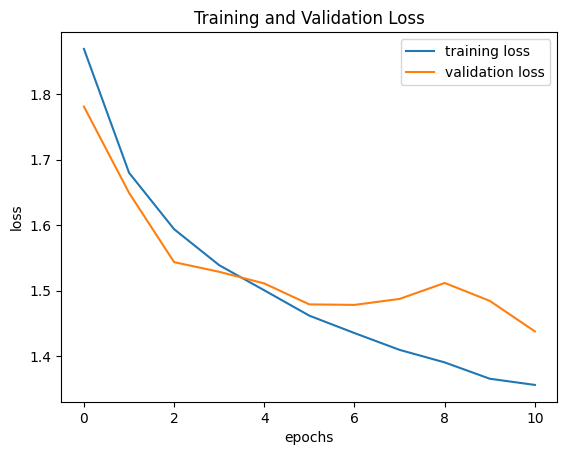

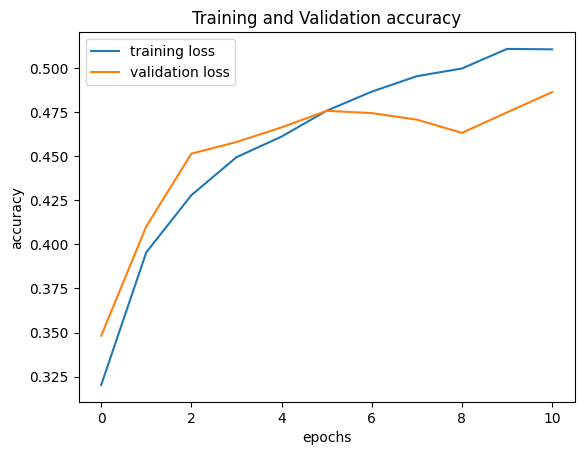

In [30]:
plt.plot(history.history['loss'], label = "training loss")
plt.plot(history.history['val_loss'], label = "validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label = "training loss")
plt.plot(history.history['val_accuracy'], label = "validation loss")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Training and Validation accuracy")
plt.legend()
plt.show()

In [34]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


1/1 [==============================] - 0s 80ms/step


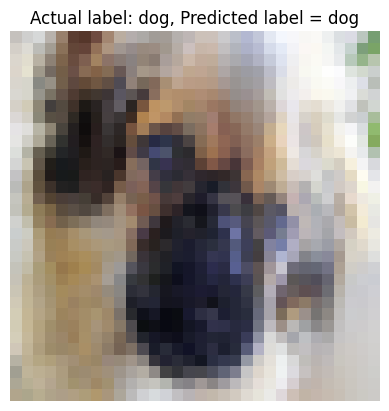

1/1 [==============================] - 0s 81ms/step


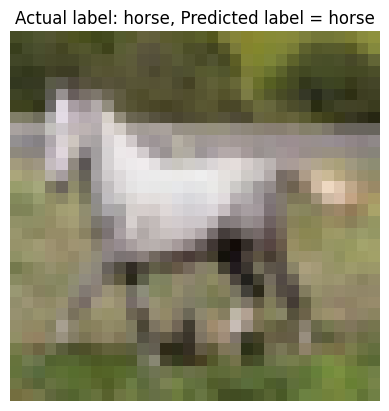

1/1 [==============================] - 0s 58ms/step


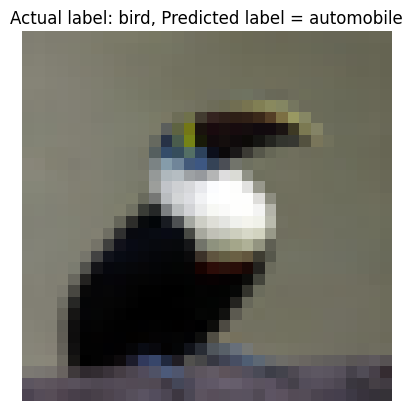

In [53]:
n = 3
random_choices = np.random.choice(x_test.shape[0], n, replace = False)

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i, index in enumerate(random_choices):
    img = x_test[index]
    label = y_test[index]
    label = np.argmax(label)

    pred = model.predict(np.expand_dims(img, axis=0))
    pred_l = np.argmax(pred)

    plt.imshow(img)
    plt.title(f"Actual label: {class_names[label]}, Predicted label = {class_names[pred_l]}")
    plt.axis("off")
    plt.show()